<a href="https://colab.research.google.com/github/bforoura/GENAI26/blob/main/Module1/chapter1_example2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Brief Introduction to LangChain**

In [2]:
# Find the latest versions of the LangChain-Google bridge and the Gemini engine, and install them
!pip install -U -q langchain-google-genai google-generativeai

# **LangChain: An Application Chain and Not a Script**

* LangChain serves as a generic interface for nearly any LLM, providing a centralized development environment to build LLM applications and integrate them with external data sources and software workflows.

* LangChain’s module-based approach allows developers and data scientists to dynamically compare different prompts and even different foundation models with minimal need to rewrite code.

* This modular environment also allows for programs that use multiple LLMs: for example, an application that uses one LLM to interpret user queries and another LLM to author a response.

* It offers several benefits to developers including:

---
1.   **Portability**

* If we use a direct Google API call, our code is **locked** to Google.
* If we want to switch to OpenAI or Anthropic later, we have to rewrite all your request and response logic.
* **Direct API approach** ==> Requires rewriting everything.
* **LangChain approach** ==> We change one line (e.g., model = ChatGoogleGenerativeAI(...)) and the rest of the chain stays exactly the same.
---
2. **Standardized Pipes**
* The **| operator** (LangChain Expression Language, LCEL) allows complex pipelines.
* While the current chain is short, a real-world chain might look like this:
  * **Retriever | Prompt | Model | Parser | Database_Upload**

* In a simple LLM call, we have to manually handle the variables, extract the text, and pass it to the next function.

* In **LangChain**, the data flows automatically through the **pipes** without the need to write middle-man code.
---
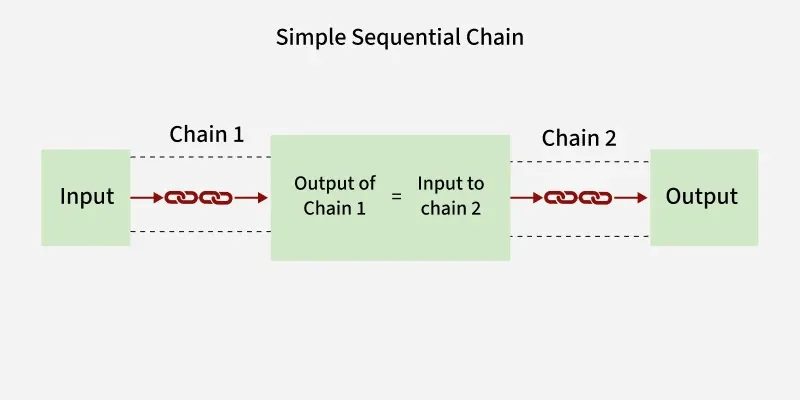



# **API-Key**

* The API Key serves as the Identity Card for your specific project. Without it, Google has no way of knowing which developer is making the request.

* The API Key also tracks how many questions your code has asked so you don't accidentally overload their servers or **exceed your free limit**.

* First, get a **free API key** from Google AI Studio.


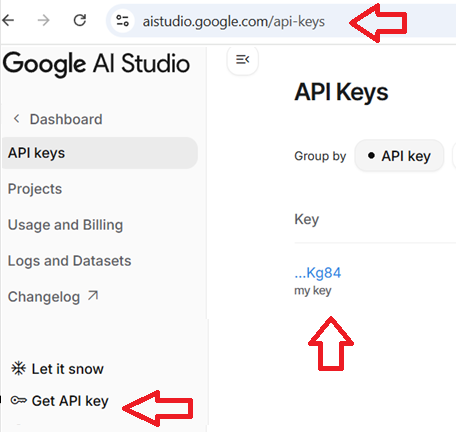

* Then, look at the left-hand sidebar in **Google Colab**
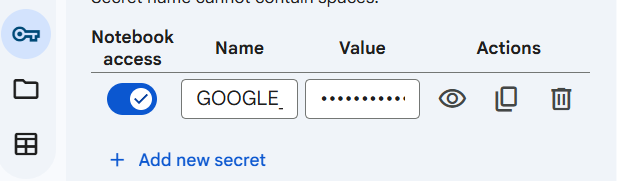
  * Click the Key icon (Secrets)
  * Click **Add new secret**
  * In the Name box, type: **GOOGLE_API_KEY**
  * In the Value box, paste your API key
  * Switch the toggle for **Notebook access** to **ON**

# **Example 1**

---
1. Let's reates a reusable AI pipeline or **Chain** that acts like a **specialized travel assistant**.
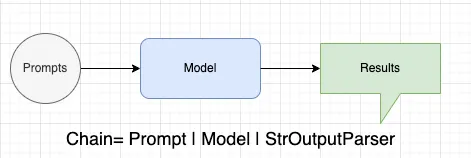
---

2. Instead of manually talking to the AI, we have a **machine** that follows these three steps every time we run it:

 *  **Preparation (Prompt)**: It takes a city name (like "Tokyo") and plugs it into a pre-written instruction ("You are a travel guide..."). This ensures the AI always knows its job and stays on topic.

* **Thinking (Model)**: It sends that specific instruction to the Gemini "brain."

* **Cleaning (Parser)**: It takes the complex data sent back by the AI and strips away everything except the actual text of the answer.

---
3. This is useful because:
* we can now run this for 50 different cities in a loop without rewriting a single line of travel advice.
* every city guide will follow the exact same "3 places + 1 food" format because of the template.
* if we want to change the assistant from a **Travel Guide** to a **History Teacher**, we only have to change one line of text (the template), and the whole machine updates instantly.
---

---

In [3]:
import os
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# 1. Load the key
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')



# 2. Try the explicit model path
model_name = "models/gemini-2.5-flash-lite"

model = ChatGoogleGenerativeAI(
    model=model_name,
    temperature=0.7
)




# 3. Setup the Chain: The Variable Injection {city}

template = "You are a travel guide. Suggest 3 places in {city}."
prompt = ChatPromptTemplate.from_template(template)
chain = prompt | model | StrOutputParser()






# 4. Run it
try:
    response = chain.invoke({"city": "Tokyo"})
    print(f"Using {model_name}:")
    print(response)
except Exception as e:
    print(f"Failed with {model_name}. Error: {e}")




Using models/gemini-2.5-flash-lite:
Konnichiwa! Welcome to Tokyo, a city that pulses with an incredible blend of ancient tradition and dazzling modernity. As your personal travel guide, I'm thrilled to suggest three unforgettable experiences that capture the essence of this dynamic metropolis:

Here are my top 3 picks for you in Tokyo:

1.  **Immerse Yourself in Tradition and Serenity at Senso-ji Temple (Asakusa)**

    *   **Why Visit:** Senso-ji is Tokyo's oldest temple, and stepping through the iconic Kaminarimon Gate (Thunder Gate) feels like a journey back in time. The vibrant Nakamise-dori market leading to the main hall is a feast for the senses, filled with traditional snacks, souvenirs, and crafts. The temple itself, with its towering pagoda and serene atmosphere, offers a peaceful escape from the city's hustle.
    *   **What to Do:**
        *   **Explore Nakamise-dori:** Sample delicious street food like *agemanju* (fried sweet buns) and *ningyo-yaki* (small cakes filled wi

# **Example 2**

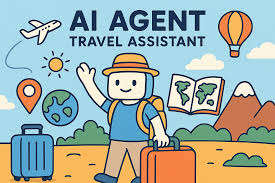

* Instead of getting a generic "Top 3" list that everyone else gets, the AI must now find the intersection between a location and a specific interest.

* It transforms a general AI into a **niche expert.** If we input **Tokyo** and **retro video games**, it skips the traditional temples and sends us to Akihabara arcade halls.

* We can now create lots of travel brochures; e.g., **Paris for Hikers,** **London for Chefs**, **NYC for Kids**, etc. by simply changing the data we feed into the invoke function, without modifying the core code again.



In [4]:
import os
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# 1. Setup
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")



# 2. Updated Template with TWO variables: {city} and {travel_style}
template = """
You are a helpful travel guide.
Suggest 3 must-visit places in {city} for someone interested in {travel_style}.
Also, suggest one famous food to try there.
Format the output as a bulleted list.
"""
prompt = ChatPromptTemplate.from_template(template)



# 3. Create the Chain
chain = prompt | model | StrOutputParser()




# 4. Run the Chain with a dictionary containing both values
response = chain.invoke({
    "city": "Tokyo",
    "travel_style": "retro video games and anime"
})

print(response)




Here are three must-visit places in Tokyo for retro video game and anime enthusiasts, along with a famous food to try in each location:

*   **Akihabara Electric Town:**
    *   **Why visit:** This is the undisputed mecca for all things anime, manga, and retro gaming. You'll find multi-story arcades like **Super Potato** (a legendary store packed with vintage consoles and games), countless shops selling new and used anime merchandise, figurines, manga, and electronics. The atmosphere is electric, and you can easily spend a whole day exploring.
    *   **Famous food to try:** **Ramen**. Akihabara has a plethora of ramen shops, from quick and casual to more specialized broth varieties. It's the perfect fuel for a day of intense gaming and browsing. Look for a shop specializing in Tonkotsu (pork bone broth) for a rich and satisfying experience.

*   **Nakano Broadway:**
    *   **Why visit:** Often described as Akihabara's slightly more mature and curated cousin, Nakano Broadway is a mult